## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').user_id.nunique() / df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query(
    "group == 'treatment' and landing_page != 'new_page'"
).user_id.nunique()

1965

f. Do any of the rows have missing values?

In [7]:
print(df.info())
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[
    ((df["group"] == "treatment") & (df["landing_page"] == "new_page"))
    | ((df["group"] == "control") &  (df["landing_page"] == "old_page"))
]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[
    (
        (df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')
    ) == False
].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2.query("user_id == 773192")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates("user_id")

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2.query("group == 'control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2.query("group == 'treatment'").converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

No there is not enough evidence to conclude that the new treatment leads to more conversion. The conversion rate of the treatment group is actually lower compared to the control group. But there is not enough information from these to conclude on the reasons of conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

* **$H_{0}$**: **$p_{new}$** - **$p_{old}$** <= 0
* **$H_{1}$**: **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new_null = df2.converted.mean()
p_new_null

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old_null = p_new_null
p_old_null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2.query("group == 'treatment'").shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2.query("group == 'control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice(
    [0,1],size=n_new,p=[(1-p_new_null),p_new_null]
)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice(
    [0,1],size=n_old,p=[(1-p_old_null),p_old_null]
)
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean() - old_page_converted.mean()

-0.00040769539710469593

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
new_simulation = np.random.binomial(n_new, p_new_null,  10000)/n_new
old_simulation = np.random.binomial(n_old, p_old_null,  10000)/n_old
p_diffs = new_simulation - old_simulation
p_diffs

array([-3.05057873e-04,  1.27103329e-03, -7.04271035e-04, ...,
        2.18643553e-03,  2.69606337e-03, -9.18436565e-05])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

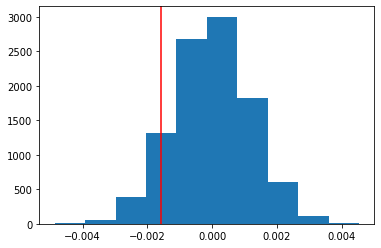

In [26]:
obs_diff = df2.query("group == 'treatment'").converted.mean() - df2.query("group == 'control'").converted.mean()
plt.hist(p_diffs);
plt.axvline(obs_diff, c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
(p_diffs > obs_diff).mean()

0.907

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Ans:** The computation in in part **j.** is known as the p-value. It is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

In this test, the Type I error rate or alpha is set at 5%. In order to reject the null hypothesis that the old page performs as well if not better of conversion then the new page. The p-value needs to be <= 0.05. Since the calculated p-value is 0.9011 the testing fails to reject the Null Hypothesis. And this means we are not able to recommend that the new page provides and improver over the old page in the conversion rate of the users.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control' and converted == 1").shape[0]
convert_new = df2.query("group == 'treatment' and converted == 1").shape[0]
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_score, p_value = sm.stats.proportions_ztest(
    [convert_new, convert_old], [n_new, n_old], alternative='larger'
)
print("z-score: {}".format(z_score))
print("p-value: {}".format(p_value))

z-score: -1.3109241984234394
p-value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Ans:** The p-value produces a value that is close to the value in parts **j.** and **k.**. This supports the previous finding that fails to reject the Null Hypothesis. This meant that we are not able to recommend that the new page provides and improver over the old page in the conversion rate of the users.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Ans:** Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df3 = df2.copy()
df3["new_page"] = pd.get_dummies(df3["landing_page"])["new_page"]
df3["ab_page"] = pd.get_dummies(df3["group"])["treatment"]
df3["intercept"] = 1
df3.head()

,user_id,timestamp,group,landing_page,converted,new_page,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [31]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) # Fix issue with new statsmodels version that removed chisqprob

In [32]:
model = sm.Logit(df3.converted, df3[['intercept','ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:00:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Ans:** The **ab_page** p-value found in **Part III** is 0.190.

The reason for the difference is due to Logit Regression summary using the **two-tailed test** while in **Part II** the p-value is use to test if the new page had a greater converion rate when compared to the old page which is a **one-tailed test**.

The one-tailed p-value can be calculated using the formula

`one-tailed p-value = 1 - (two-tailed p-value/2)`
* one-tailed p-value = 1 - (0.190 / 2) = 1 - 0.095 = 0.905

The calcuated one-tailed p-value of 0.905 is close to the **Part II** value of 0.9050583127590245

Reference: [two-tailed to a one-tailed test](https://stats.idre.ucla.edu/other/mult-pkg/faq/pvalue-htm/#:~:text=The%20easiest%20way%20to%20convert,value%20provided%20in%20the%20output. "two-tailed to a one-tailed test")

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Ans:** The `ab_page` testing did not provide a conclusive analysis to provide evidence to reject the Null Hypothesis. In this scenario the introduction of other independant variable might be useful to understand the conversion rate of the pages.

But the addition of independant variables also introduces the possiblity of Multicollinearity if the variables are highly correlated. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.

Reference: [Multicollinearity](https://link.springer.com/chapter/10.1007/978-0-585-25657-3_37#:~:text=Multicollinearity%20exists%20whenever%20an%20independent,significance%20of%20an%20independent%20variable. "Multicollinearity")

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

**Ans:** Looking into the summary results just based on the using the countries as the independant variables shows all the p-values to be > 0.05. These results fails to reject the null Hypothesis which provides little argument to recommend the new page for better conversion rates.

In [34]:
df_countries = pd.read_csv("countries.csv")
df4 = df3.join(
    df_countries.set_index('user_id'), 
    on="user_id", 
    how="inner"
)
df4[["country_us","country_ca"]] = pd.get_dummies(df4["country"])[["US","CA"]]
df4 = df4.drop(["group", "landing_page", "country"], axis=1)
display(df4.head())
model = sm.Logit(df4.converted, df4[["intercept","country_us","country_ca"]])
result = model.fit()
result.summary()

,user_id,timestamp,converted,new_page,ab_page,intercept,country_us,country_ca
0,851104,2017-01-21 22:11:48.556739,0,0,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,0,0,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,0,1,1,1,1,0
3,853541,2017-01-08 18:28:03.143765,0,1,1,1,1,0
4,864975,2017-01-21 01:52:26.210827,1,0,0,1,1,0


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 20 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        22:00:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
country_us    -0.0099      0.013     -0.746      0.456      -0.036       0.016
country_ca    -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

**Ans:** Looking into the summary results after applying the interaction between the page and countries still shows all the p-values to be > 0.05. These results fails to reject the null Hypothesis which provides little argument to recommend the new page for better conversion rates.

In [35]:
df4['ca_page'] = df4.country_ca * df4.new_page
df4['us_page'] = df4.country_us * df4.new_page
df4.head()
model = sm.Logit(df4.converted, df4[["intercept","new_page","country_us","country_ca","us_page","ca_page"]])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 20 Jun 2020   Pseudo R-squ.:               3.482e-05
Time:                        22:00:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
new_page       0.0108      0.023      0.475      0.635      -0.034       0.056
country_us     0.0057      0.019      0.306      0.760      -0.031       0.043
country_ca    -0.0118      0.040     -0.296      0.767      -0.090       0.066
us_page       -0.0314      0.027     -1.181      0.238      -0.084       0.021
ca_page       -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

<a id='conclusions'></a>
## Finishing Up

Looking into the results shown in all the different views into the AB testing results. We found no evidence to reject the null Hypothesis **$H_{0}$**: **$p_{new}$** - **$p_{old}$** <= 0. Based on this we can conclude that there is no evidence that we should recommend the new page for better conversion rates.

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1